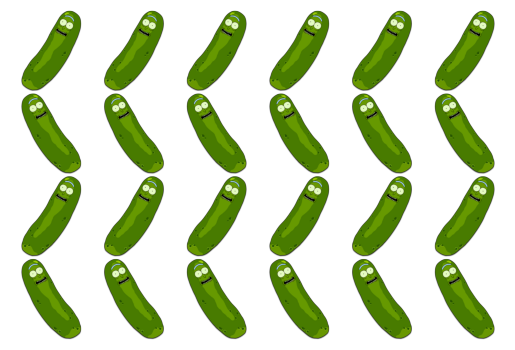

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the image
loc_input = os.path.join('data', 'input', "pickle_rick.png")
loc_output = os.path.join('data', 'output')
image = Image.open(loc_input)
np_image = np.array(image)

np_image.shape

# Get the size of the original image
img_height, img_width = np_image.shape[:2]

# Initialize a new array to hold the tiled image
tiled_height = img_height * 4
tiled_width = img_width * 6
tiled_image = np.zeros((tiled_height, tiled_width, np_image.shape[2]), dtype=np_image.dtype)

# Manually repeat the image by copying it into the correct positions
for i in range(4): # Vertical replication
    for j in range(6): # Horizontal replication
        vertical_start = i * img_height
        vertical_end = (i + 1) * img_height
        horizontal_start = j * img_width
        horizontal_end = (j + 1) * img_width
        
        # Alternate mirroring
        if i % 2 == 0:
            tiled_image[vertical_start:vertical_end, horizontal_start:horizontal_end] = np_image[:, :]
        else:
            tiled_image[vertical_start:vertical_end, horizontal_start:horizontal_end] = np_image[:, ::-1]

# Display the tiled image
plt.imshow(tiled_image)
plt.axis('off') # Hide the axis
plt.show()

# Save the tiled image
output_image = Image.fromarray(tiled_image)
output_image.save(os.path.join(loc_output, 'tiled_pickle_rick_mirrored.png'))